# Titanic: Machine Learning from Disaster

In this notebook, we will be predicting the survival of a passenger on the Titanic to get familiar with the basics of Machine Learning.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this task, we will be building a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

- Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex: Gender
- Age: Age in years
- Sibsp: No. of siblings / spouses aboard the Titanic
- Parch: No. of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
- Target class: Survived: Survival (0 = No, 1 = Yes)

Data Source:
https://www.kaggle.com/c/titanic

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
ds = pd.read_csv('Titanic_Data.csv')

In [3]:
len(ds)

891

In [4]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
ds.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Data Breakdown

In [6]:
total = ds
survived = ds[ds.Survived == 1]
not_survived = ds[ds.Survived == 0]

In [7]:
print('Total passengers = ', len(total))
print('Number of passengers who survived = ', len(survived))
print('Number of passengers who did not survived = ', len(not_survived))
print('% Survived = ', round(len(survived)/len(total) * 100, 0), '%')
print('% Not Survived = ', round(len(not_survived)/len(total) * 100, 0), '%')

Total passengers =  891
Number of passengers who survived =  342
Number of passengers who did not survived =  549
% Survived =  38.0 %
% Not Survived =  62.0 %


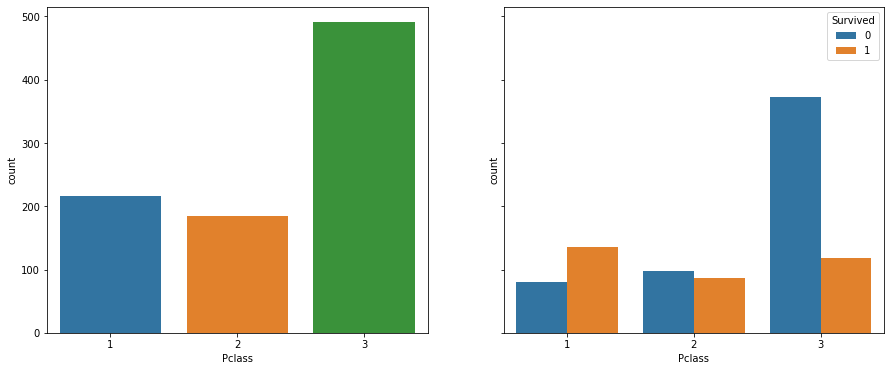

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
sns.countplot(data = ds, x = 'Pclass', ax = axes[0])
sns.countplot(data = ds, x = 'Pclass', ax = axes[1], hue = 'Survived')

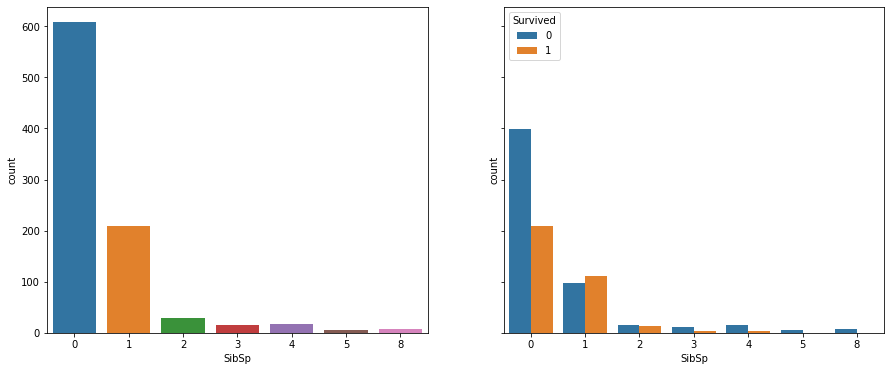

In [9]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
sns.countplot(data = ds, x = 'SibSp', ax = axes[0])
sns.countplot(data = ds, x = 'SibSp', ax = axes[1], hue = 'Survived')

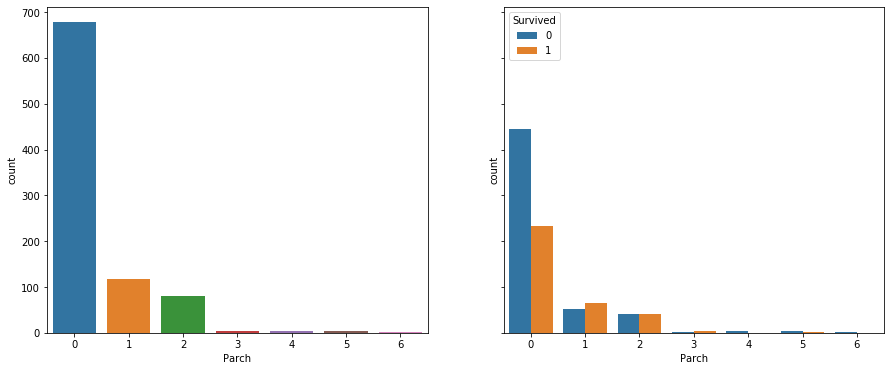

In [10]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
sns.countplot(data = ds, x = 'Parch', ax = axes[0])
sns.countplot(data = ds, x = 'Parch', ax = axes[1], hue = 'Survived')

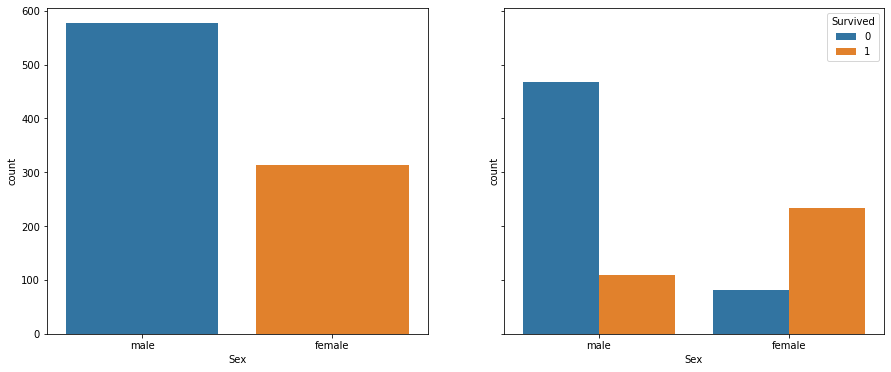

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
sns.countplot(data = ds, x = 'Sex', ax = axes[0])
sns.countplot(data = ds, x = 'Sex', ax = axes[1], hue = 'Survived')

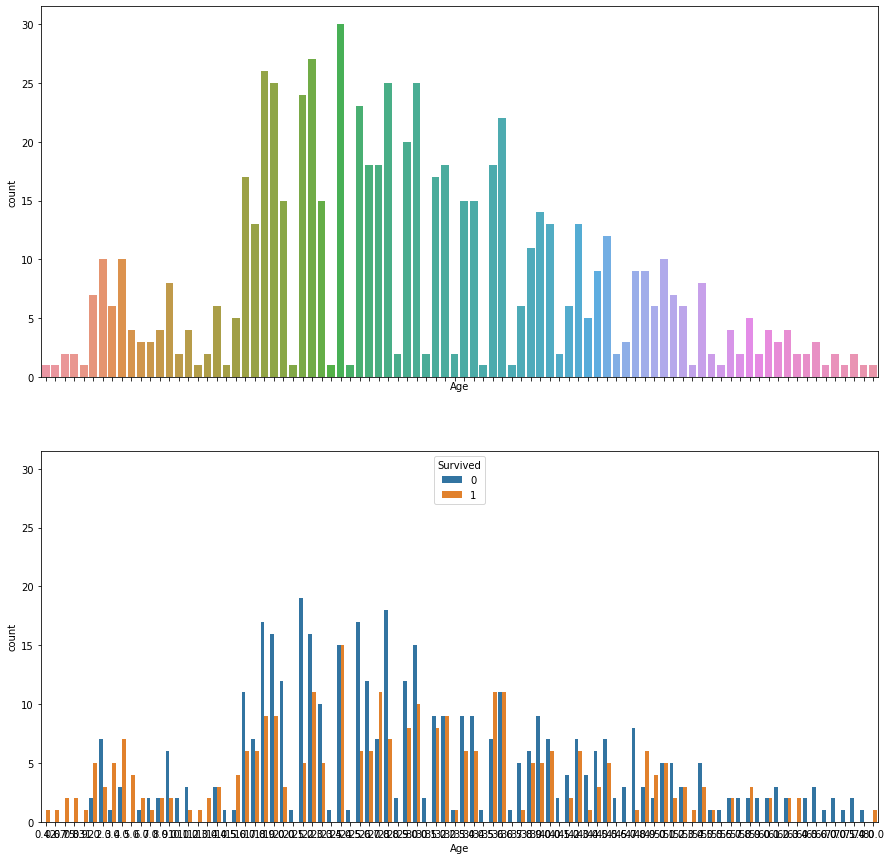

In [12]:
fig, axes = plt.subplots(2, 1, figsize = (15, 15), sharex = True, sharey = True)
sns.countplot(data = ds, x = 'Age', ax = axes[0])
sns.countplot(data = ds, x = 'Age', ax = axes[1], hue = 'Survived')

/Users/mohitgoel/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mohitgoel/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


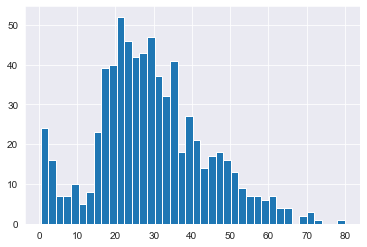

In [13]:
sns.set_style('darkgrid')
plt.hist(ds.Age, bins = 40)
import warnings
warnings.filterwarnings('ignore')

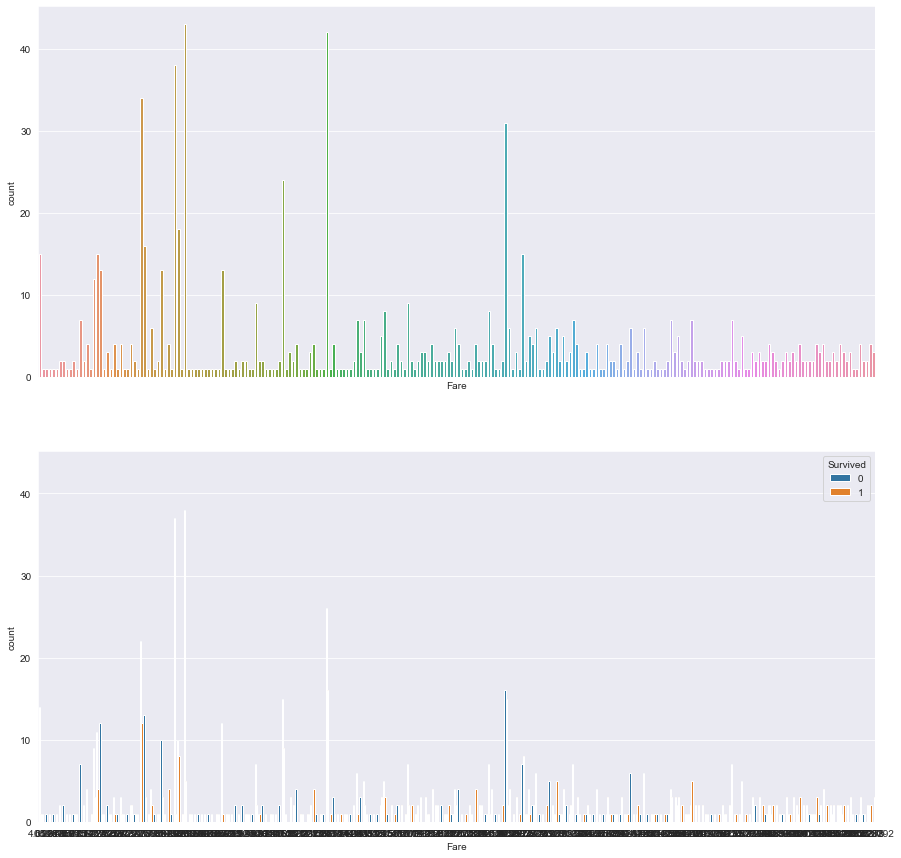

In [14]:
fig, axes = plt.subplots(2, 1, figsize = (15, 15), sharex = True, sharey = True)
sns.countplot(data = ds, x = 'Fare', ax = axes[0])
sns.countplot(data = ds, x = 'Fare', ax = axes[1], hue = 'Survived')

(array([ 17., 320., 129.,  53.,  43., 104.,  31.,  19.,   4.,  12.,  23.,
         16.,   6.,  12.,  10.,  19.,  10.,   8.,   2.,   0.,   2.,   6.,
          3.,   4.,   0.,   0.,   7.,   0.,   2.,   7.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.,   1.,
          4.,   0.,   0.,   0.,   2.,   0.,   0.,   6.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          3.]),
 array([  0.      ,   5.123292,  10.246584,  15.369876,  20.493168,
         25.61646 ,  30.739752,  35.863044,  40.986336,  46.109628,
         51.23292 ,  56.356212,  61.479504,  66.602796,  71.726088,
         76.84938 ,  81.972672,  87.095964,  92.219256,  97.342548,
        102.46584 , 107.589132, 112.712424, 11

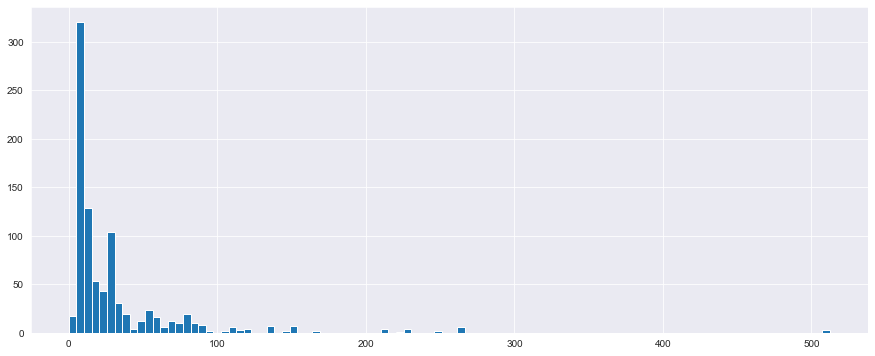

In [15]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (15,6)
plt.hist(ds.Fare, bins = 100)

# Missing Data

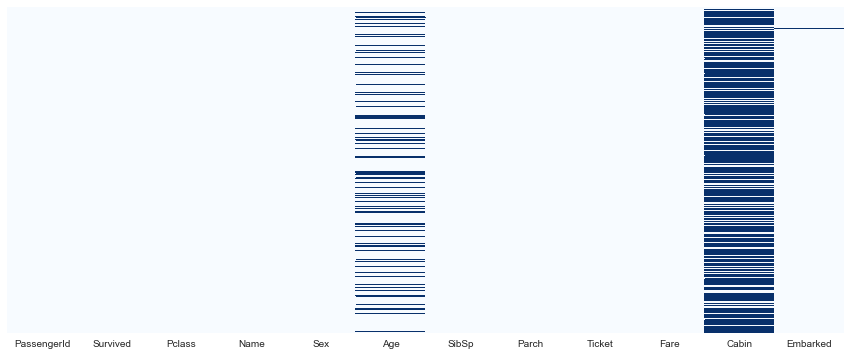

In [16]:
sns.heatmap(ds.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [17]:
ds.drop(columns = 'Cabin', axis = 1, inplace = True)

In [18]:
ds.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [19]:
ds.drop(columns = ['Name', 'Ticket', 'Embarked', 'PassengerId'], axis = 1, inplace = True)

In [20]:
ds.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


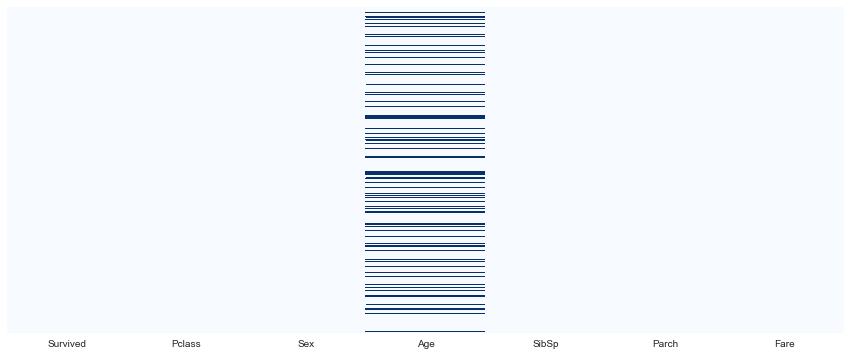

In [21]:
sns.heatmap(ds.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

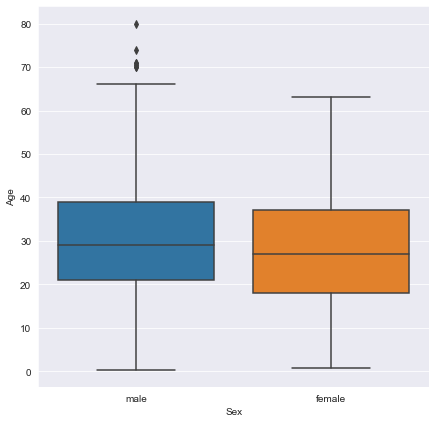

In [22]:
plt.rcParams['figure.figsize'] = (7,7)
sns.boxplot(data = ds, x = 'Sex', y = 'Age')

In [23]:
ds[ds.Sex == 'male'].Age.median()

29.0

In [24]:
ds[ds.Sex == 'female'].Age.median()

27.0

In [25]:
def Fill_Age(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age):
        if sex is 'male': 
            return 29
        else:
            return 27
    else:
        return age
        

In [26]:
ds['Age'] = ds[['Age','Sex']].apply(Fill_Age,axis=1)

In [27]:
ds[ds.Sex == 'male'].Age

0      22.0
4      35.0
5      27.0
6      54.0
7       2.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: Age, Length: 577, dtype: float64

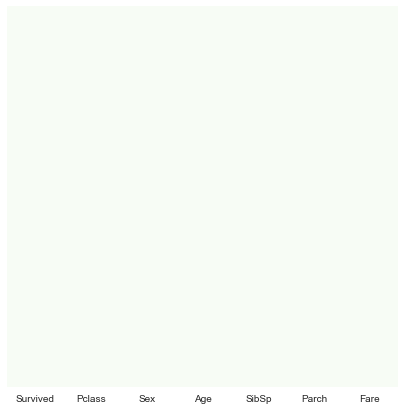

In [28]:
# We observe no missing data; the desired outcome. Let's move onto the next step.

sns.heatmap(ds.isnull(), yticklabels = False, cbar = False, cmap = 'Greens')

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

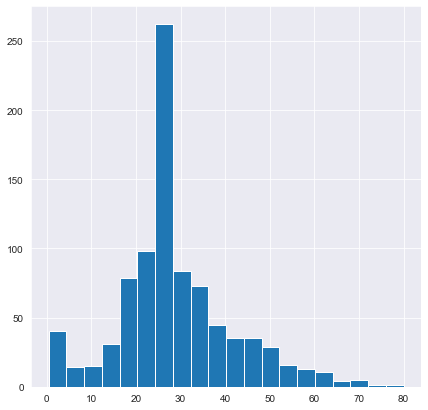

In [29]:
plt.hist(ds.Age, bins = 20)

In [30]:
ds.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


# Encoding the Categorical Variables

In [32]:
X = ds.iloc[:, 1:].values
y = ds.iloc[:, 0].values

In [36]:
X

array([[3, 'male', 22.0, 1, 0, 7.25],
       [1, 'female', 38.0, 1, 0, 71.2833],
       [3, 'female', 26.0, 0, 0, 7.925],
       ...,
       [3, 'female', 27.0, 1, 2, 23.45],
       [1, 'male', 26.0, 0, 0, 30.0],
       [3, 'male', 32.0, 0, 0, 7.75]], dtype=object)

In [38]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le_X = LabelEncoder()

In [39]:
X[:, 1] = le_X.fit_transform(X[:, 1])

In [43]:
# We observe that male has been encoded to 1 and women have been encoded to 0

X

array([[3, 1, 22.0, 1, 0, 7.25],
       [1, 0, 38.0, 1, 0, 71.2833],
       [3, 0, 26.0, 0, 0, 7.925],
       ...,
       [3, 0, 27.0, 1, 2, 23.45],
       [1, 1, 26.0, 0, 0, 30.0],
       [3, 1, 32.0, 0, 0, 7.75]], dtype=object)

# Splitting the data into the training set and test set

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fitting the Logistic Regression to the dataset

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# Predicting the Test set values

y_pred = lr.predict(X_test)

# Making the confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [51]:
cm

array([[92, 18],
       [17, 52]])

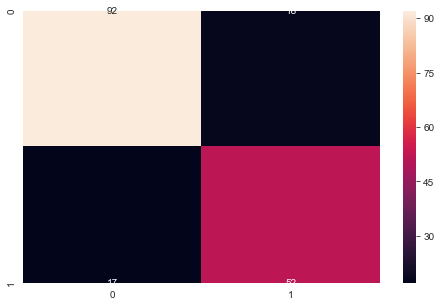

In [63]:
plt.rcParams['figure.figsize'] = (8,5)
sns.heatmap(cm, annot = True, fmt = 'd')

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.75      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179

